<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/Unsupervision_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(20, 70, 100),
    'BMI': np.round(np.random.uniform(18, 35, 100), 1),
    'SleepHours': np.random.randint(4, 10, 100),
    'StepsPerDay': np.random.randint(2000, 12000, 100),
    'StressLevel': np.random.randint(1, 10, 100)
})

In [2]:
df

,Age,BMI,SleepHours,StepsPerDay,StressLevel
0,58,25.2,7,9679,7
1,48,24.7,6,10208,5
2,34,23.0,7,9339,5
3,62,18.2,6,11435,7
4,27,21.4,5,4205,9
...,...,...,...,...,...
95,34,31.6,8,11874,9
96,64,20.6,6,6752,3
97,20,26.6,7,10311,9
98,44,29.8,6,2830,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.describe()

,Age,BMI,SleepHours,StepsPerDay,StressLevel
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,44.070000,26.23300,6.350000,6604.530000,4.640000
std,14.447575,4.60145,1.725478,2833.900038,2.618967
min,20.000000,18.00000,4.000000,2004.000000,1.000000
25%,33.000000,22.37500,5.000000,4127.500000,2.000000
50%,43.000000,25.90000,6.000000,6764.500000,5.000000
75%,58.000000,29.80000,8.000000,8985.000000,7.000000
max,69.000000,35.00000,9.000000,11907.000000,9.000000


In [6]:
df.isnull().sum()

,0
Age,0
BMI,0
SleepHours,0
StepsPerDay,0
StressLevel,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
scaled_data

array([[ 0.96903299, -0.2256254 ,  0.37860509,  1.09035554,  0.9056582 ],
       [ 0.27338834, -0.33483421, -0.20386428,  1.27796449,  0.13815125],
       [-0.70051415, -0.70614417,  0.37860509,  0.96977512,  0.13815125],
       [ 1.24729084, -1.75454875, -0.20386428,  1.71311795,  0.9056582 ],
       [-1.1874654 , -1.05561236, -0.78633365, -0.85098922,  1.67316515],
       [-0.28312737,  0.84462094, -0.20386428, -1.25386968,  0.13815125],
       [ 0.96903299,  1.12856384, -0.20386428, -0.41157999, -1.39686265],
       [-0.4222563 ,  0.45146922,  0.37860509, -1.25706152, -1.39686265],
       [-0.14399844,  1.63092437,  0.37860509, -0.80772213, -1.01310917],
       [-0.97877201,  0.62620332, -1.36880302, -0.42009154,  0.52190473],
       [-0.97877201,  1.60908261, -1.36880302, -1.52623958,  1.67316515],
       [-0.07443398,  1.36882323, -0.78633365, -1.41807185,  1.28941168],
       [ 0.76033959, -0.13825835, -1.36880302, -0.50875362,  0.13815125],
       [ 1.03859745, -1.44876408, -0.2

In [10]:
from sklearn.cluster import KMeans, DBSCAN

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

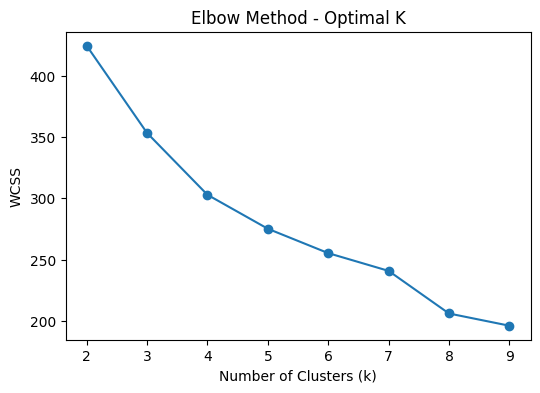

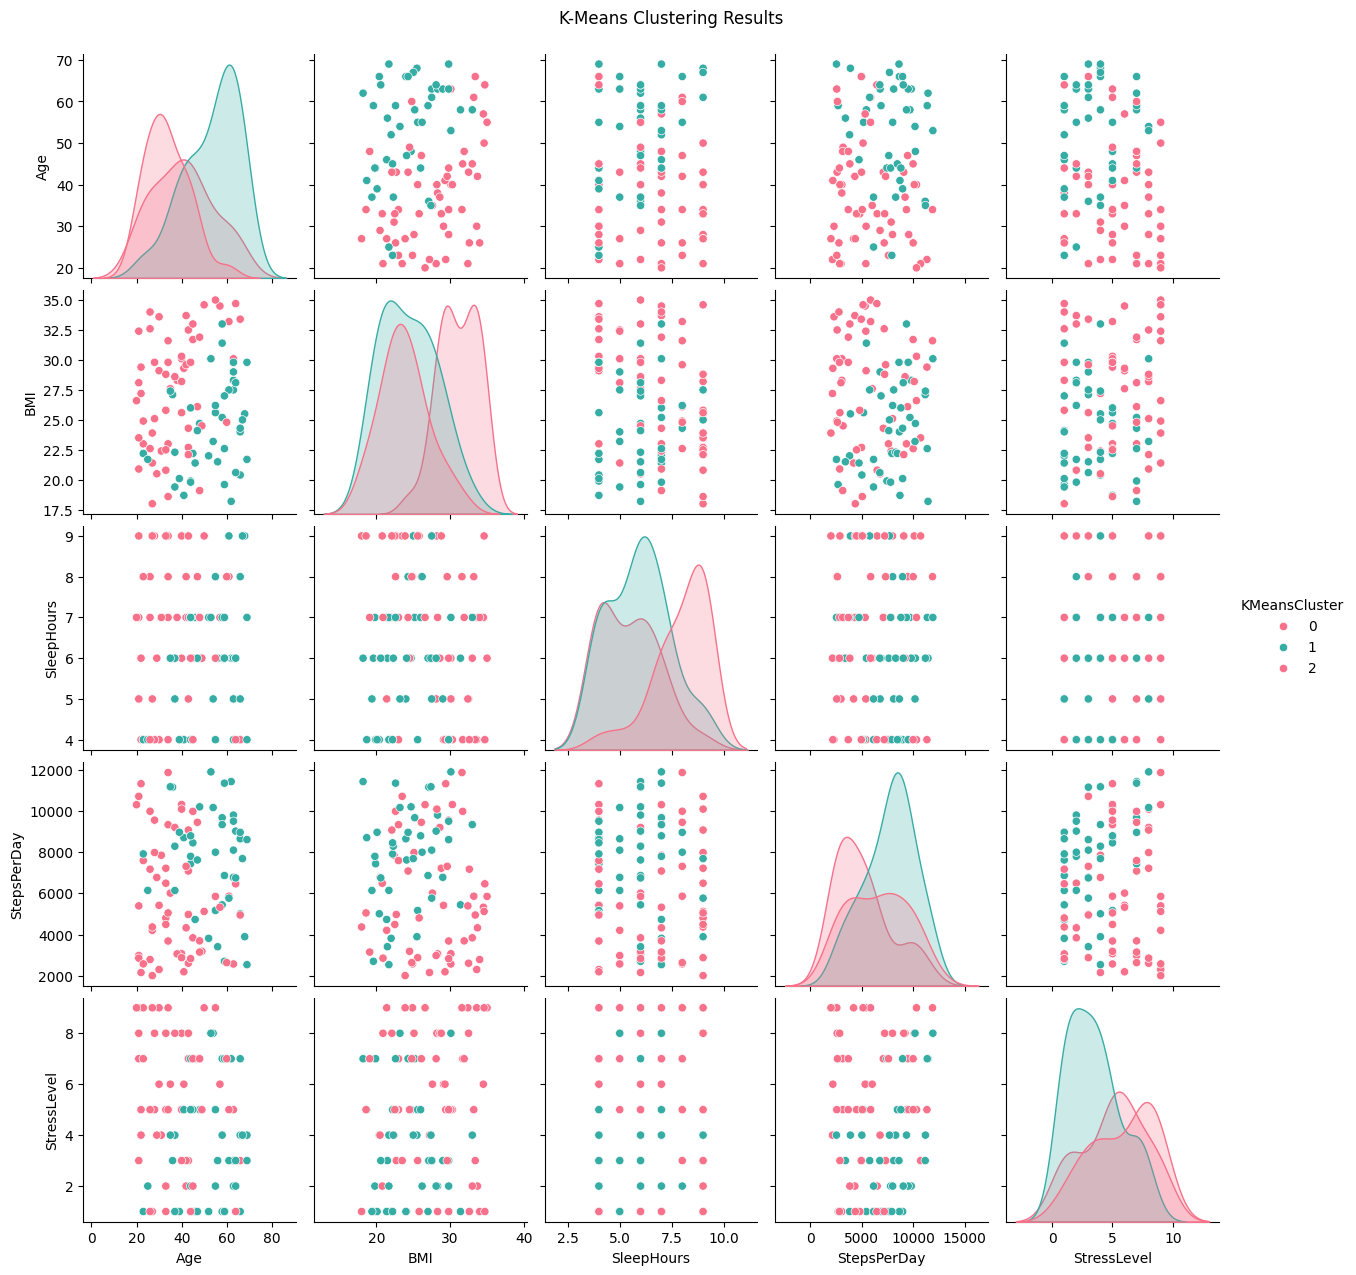

In [12]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()
# Choose optimal k (say k=3 based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeansCluster'] = kmeans.fit_predict(scaled_data)
sns.pairplot(df, hue='KMeansCluster', palette='husl')
plt.suptitle("K-Means Clustering Results", y=1.02)
plt.show()

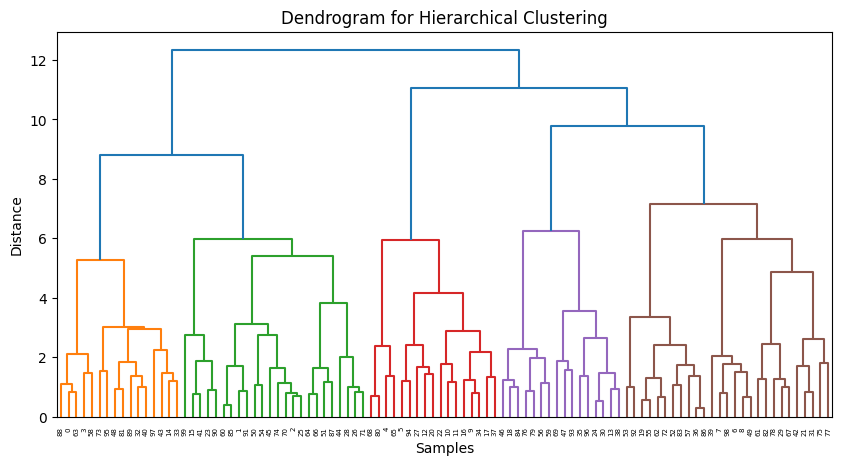

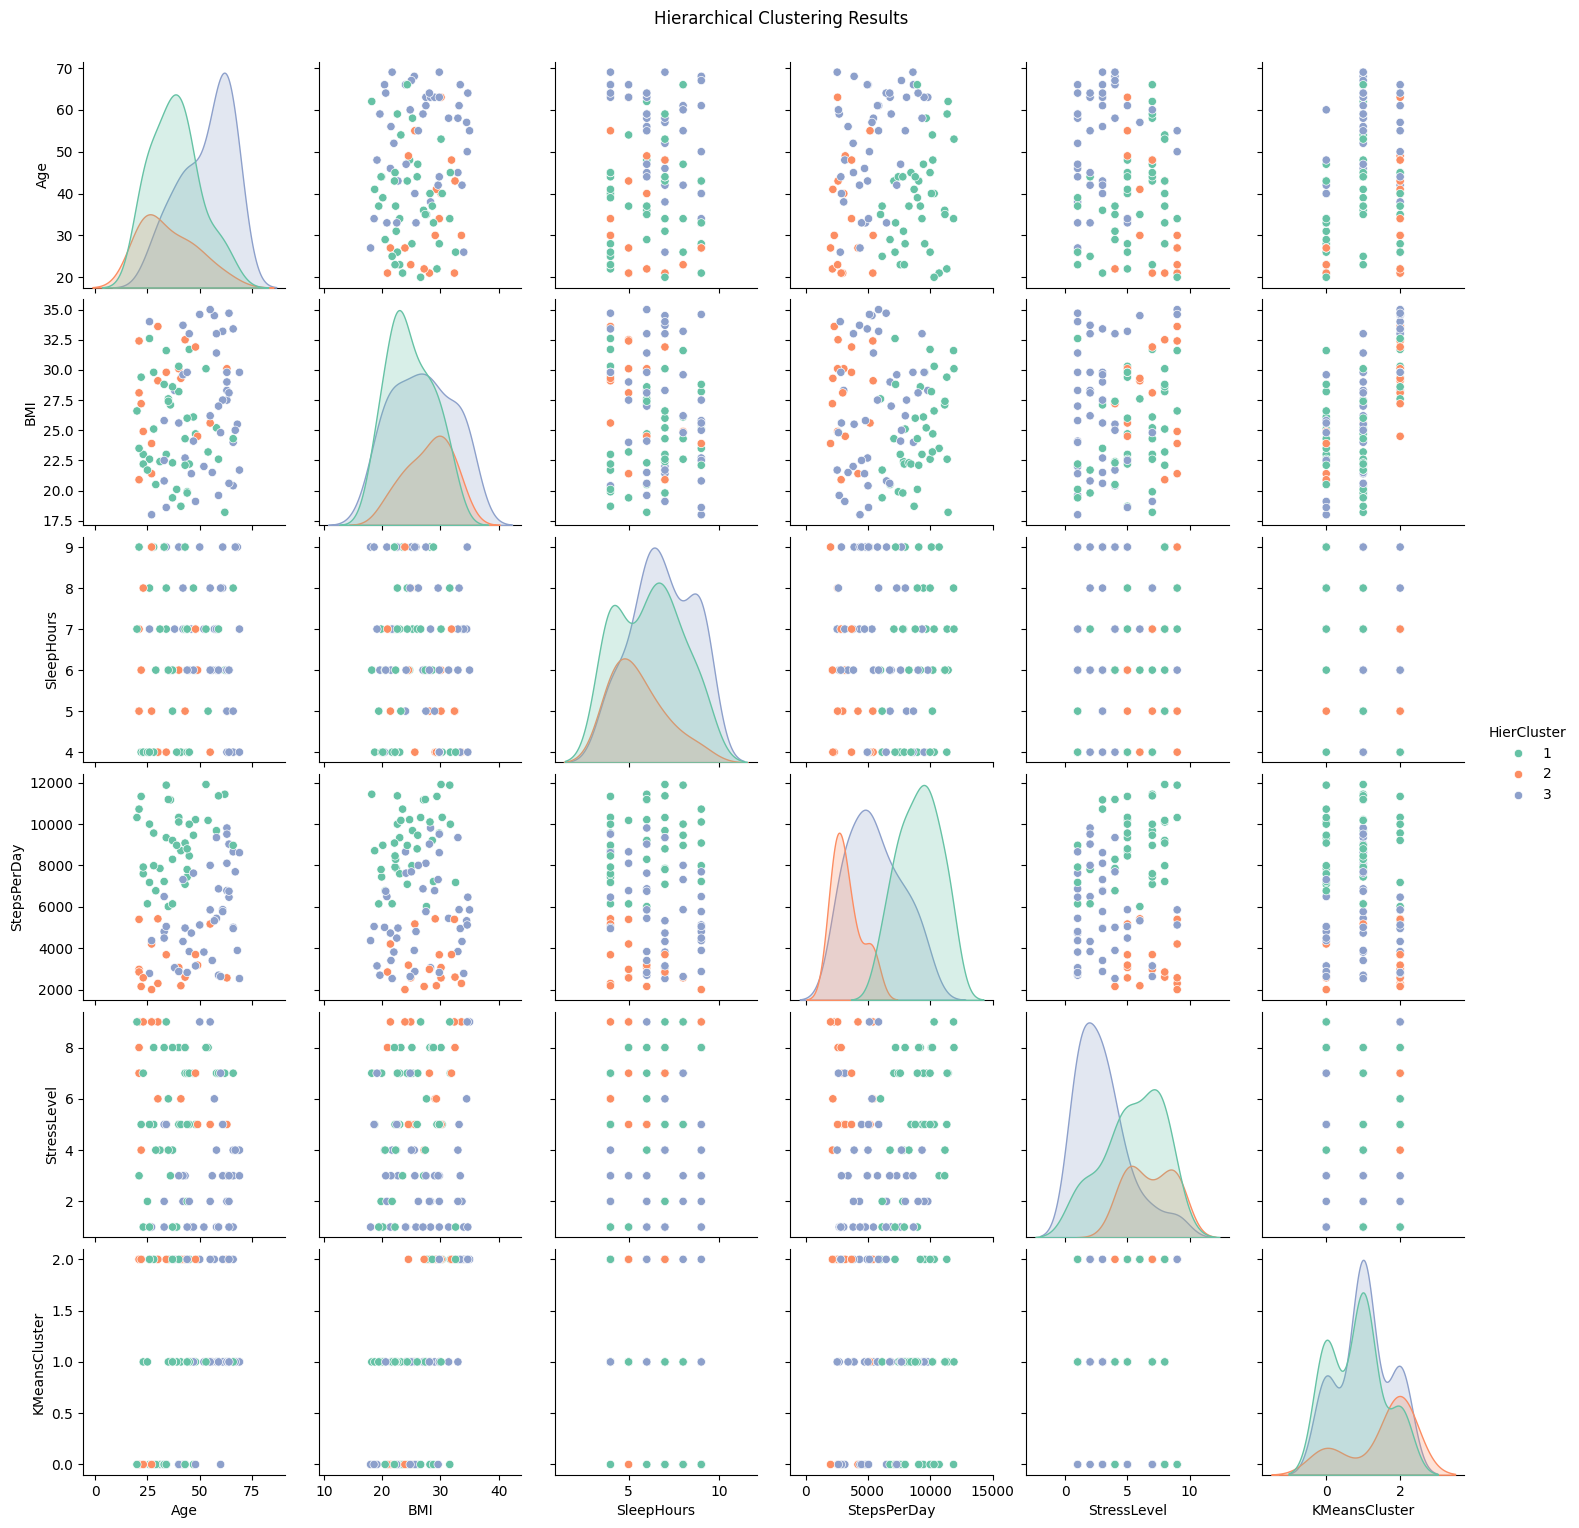

In [13]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
# Decide cluster count from dendrogram (say 3)
hier_labels = fcluster(linked, t=3, criterion='maxclust')
df['HierCluster'] = hier_labels
sns.pairplot(df, hue='HierCluster', palette='Set2')
plt.suptitle("Hierarchical Clustering Results", y=1.02)
plt.show()

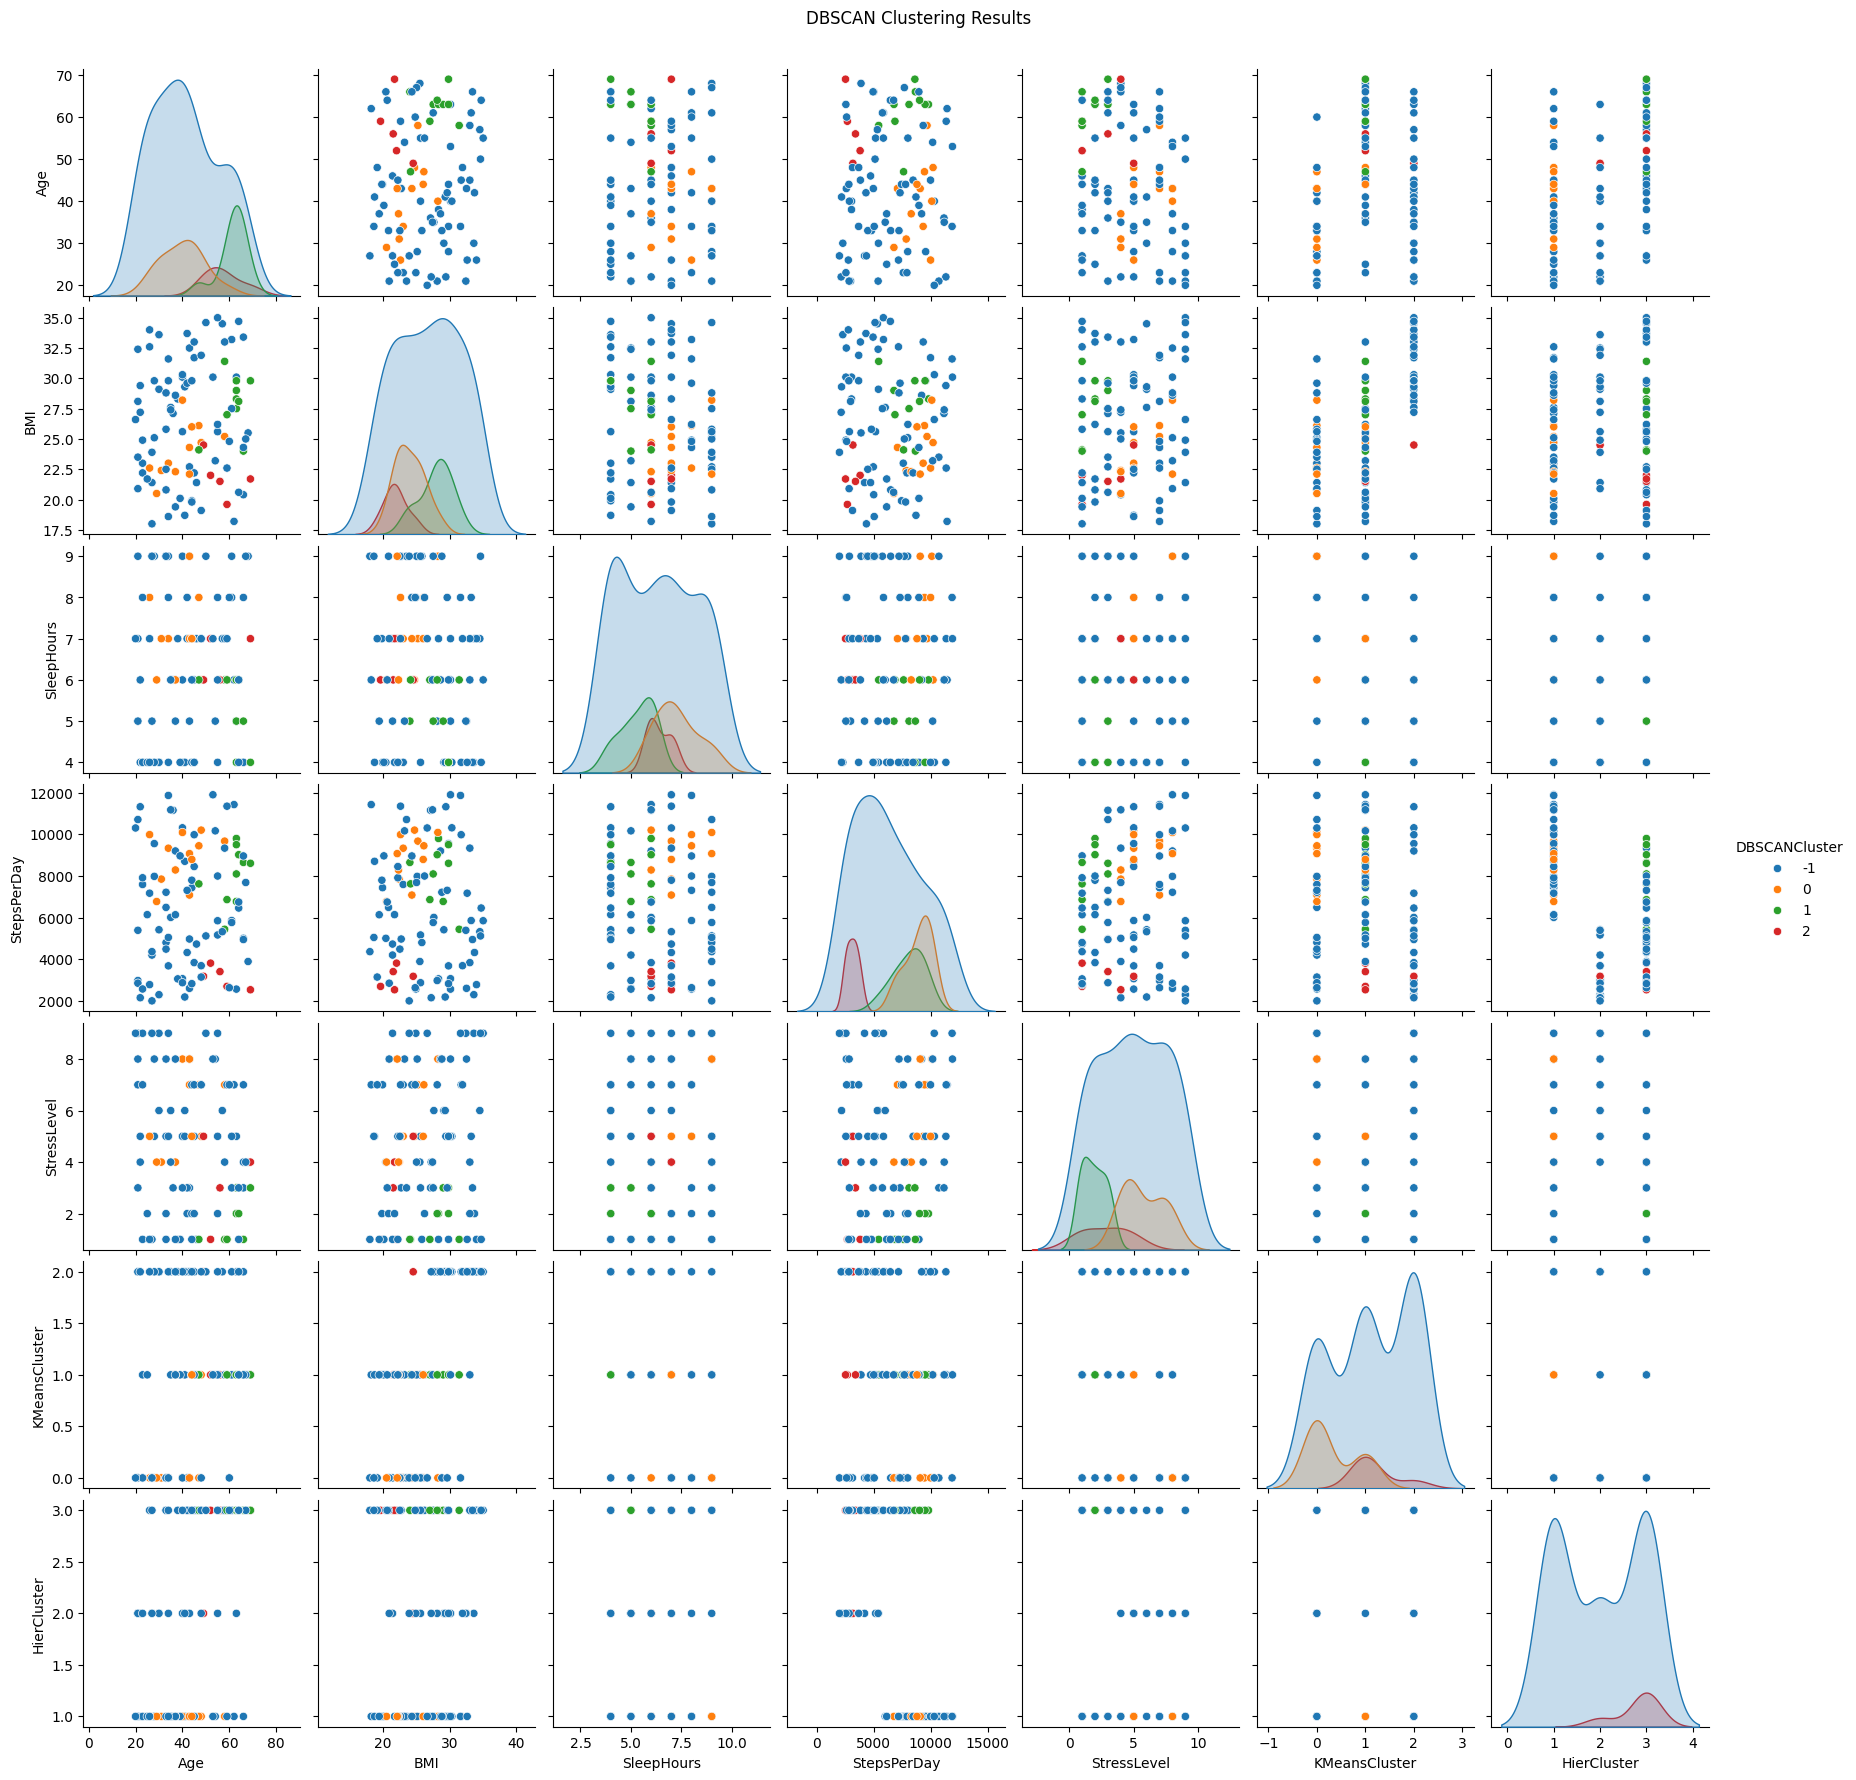

In [15]:
dbscan = DBSCAN(eps=1.2, min_samples=5)  # tune eps as needed
df['DBSCANCluster'] = dbscan.fit_predict(scaled_data)
sns.pairplot(df, hue='DBSCANCluster', palette='tab10')
plt.suptitle("DBSCAN Clustering Results", y=1.02)
plt.show()

In [16]:
summary = df.groupby(['KMeansCluster', 'HierCluster', 'DBSCANCluster']).mean(numeric_only=True)
print("\nCluster Centroids (averages):")
display(summary)
print("\n✅ Observations:")
print("""
- K-Means tends to form spherical, equally-sized clusters.
- Hierarchical clustering shows structure and nested relationships.
- DBSCAN identifies noise points (label = -1) and arbitrary-shaped clusters.
""")


Cluster Centroids (averages):


Age        BMI  SleepHours  \
KMeansCluster HierCluster DBSCANCluster                                     
0             1           -1             26.500000  26.433333    7.666667   
                           0             36.625000  23.650000    7.625000   
              2           -1             24.500000  22.775000    7.250000   
              3           -1             39.300000  22.750000    8.600000   
1             1           -1             44.200000  22.460000    5.400000   
                           0             46.750000  24.550000    6.500000   
              2           -1             55.000000  25.600000    4.000000   
              3           -1             60.625000  24.950000    7.375000   
                           1             61.500000  27.900000    5.300000   
                           2             59.000000  21.200000    6.500000   
2             1           -1             33.285714  30.000000    4.571429   
              2           -1             35.727273  30.372727    5.000000   
                           2             49.000000  24.500000    6.000000   
              3           -1             49.818182  33.109091    6.454545   

                                         StepsPerDay  StressLevel  
KMeansCluster HierCluster DBSCANCluster                            
0             1           -1             9284.166667     7.333333  
                           0             8710.000000     6.000000  
              2           -1             2909.000000     8.750000  
              3           -1             4616.000000     3.700000  
1             1           -1             9184.800000     4.533333  
                           0             9244.750000     5.250000  
              2           -1             5170.000000     5.000000  
              3           -1             6399.250000     3.125000  
                           1             8043.100000     1.900000  
                           2             3115.250000     2.250000  
2             1           -1             9084.857143     5.285714  
              2           -1             3278.363636     6.454545  
                           2             3184.000000     5.000000  
              3           -1             4584.090909     3.636364


✅ Observations:

- K-Means tends to form spherical, equally-sized clusters.
- Hierarchical clustering shows structure and nested relationships.
- DBSCAN identifies noise points (label = -1) and arbitrary-shaped clusters.

